# Topic Mapping

## Import Python packages

In [1]:
import os
import pandas as pd
from collections import Counter
import geopandas as gpd
import matplotlib.pyplot as plt
import json
import re

## Load the list of countries

In [2]:
# load the list of countries from the file
with open(os.path.join('data','country_names_with_adjectival_forms.json')) as f:
    countries = json.load(f)

countries

{'Afghanistan': 'Afghan',
 'Albania': 'Albanian',
 'Algeria': 'Algerian',
 'Andorra': 'Andorran',
 'Angola': 'Angolan',
 'Antigua and Barbuda': 'Antiguan and Barbudan',
 'Argentina': 'Argentinian',
 'Armenia': 'Armenian',
 'Australia': 'Australian',
 'Austria': 'Austrian',
 'Azerbaijan': 'Azerbaijani',
 'Bahamas': 'Bahamian',
 'Bahrain': 'Bahraini',
 'Bangladesh': 'Bangladeshi',
 'Barbados': 'Barbadian',
 'Belarus': 'Belarusian',
 'Belgium': 'Belgian',
 'Belize': 'Belizean',
 'Benin': 'Beninese',
 'Bhutan': 'Bhutanese',
 'Bolivia': 'Bolivian',
 'Bosnia and Herzegovina': 'Bosnian and Herzegovinian',
 'Botswana': 'Botswanan',
 'Brazil': 'Brazilian',
 'Brunei': 'Bruneian',
 'Bulgaria': 'Bulgarian',
 'Burkina Faso': 'Burkinabe',
 'Burundi': 'Burundian',
 'Cabo Verde': 'Cape Verdean',
 'Cambodia': 'Cambodian',
 'Cameroon': 'Cameroonian',
 'Canada': 'Canadian',
 'Central African Republic': 'Central African',
 'Chad': 'Chadian',
 'Chile': 'Chilean',
 'China': 'Chinese',
 'Colombia': 'Colombia

In [3]:
countries_dict = {country: [country.lower(), adjective.lower()] for country, adjective in countries.items()}
countries_dict

{'Afghanistan': ['afghanistan', 'afghan'],
 'Albania': ['albania', 'albanian'],
 'Algeria': ['algeria', 'algerian'],
 'Andorra': ['andorra', 'andorran'],
 'Angola': ['angola', 'angolan'],
 'Antigua and Barbuda': ['antigua and barbuda', 'antiguan and barbudan'],
 'Argentina': ['argentina', 'argentinian'],
 'Armenia': ['armenia', 'armenian'],
 'Australia': ['australia', 'australian'],
 'Austria': ['austria', 'austrian'],
 'Azerbaijan': ['azerbaijan', 'azerbaijani'],
 'Bahamas': ['bahamas', 'bahamian'],
 'Bahrain': ['bahrain', 'bahraini'],
 'Bangladesh': ['bangladesh', 'bangladeshi'],
 'Barbados': ['barbados', 'barbadian'],
 'Belarus': ['belarus', 'belarusian'],
 'Belgium': ['belgium', 'belgian'],
 'Belize': ['belize', 'belizean'],
 'Benin': ['benin', 'beninese'],
 'Bhutan': ['bhutan', 'bhutanese'],
 'Bolivia': ['bolivia', 'bolivian'],
 'Bosnia and Herzegovina': ['bosnia and herzegovina',
  'bosnian and herzegovinian'],
 'Botswana': ['botswana', 'botswanan'],
 'Brazil': ['brazil', 'brazil

## Load topics data

In [4]:
zeroshot_min_similarity = .80 # .70 | .80 | .85
min_topic_size = 50
representation = 'KeyBERTInspired' # KeyBERTInspired | gpt-3.5-turbo

key_topics = ["race", "gender", "nationality", "ethnicity", "language", "religion", "disability"]

df_document_info = pd.read_csv(os.path.join('outputs','document_topic_info_zeroshot_'+representation+'_minsize'+str(min_topic_size)+'_minsimilarity'+str(zeroshot_min_similarity)+'.csv'))

In [5]:
df_document_info.head()

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,protest call demonstration remonstration remon...,0,religion,"['iran', 'protest', 'protester', 'muslims', 'm...",['ashura protest series protest occur 27 decem...,iran - protest - protester - muslims - mosque ...,False
1,protest song song associate movement protest s...,0,religion,"['iran', 'protest', 'protester', 'muslims', 'm...",['ashura protest series protest occur 27 decem...,iran - protest - protester - muslims - mosque ...,False
2,series protest blockade canada covid-19 vaccin...,2,language,"['protest', 'protester', 'activist', 'demonstr...",['description domestic international reaction ...,protest - protester - activist - demonstration...,False
3,citizenship amendment act bill protest know ca...,1,nationality,"['protest', 'country', '2019', 'world', 'polit...",['list 2014 event occur europe \n\n incumbent ...,protest - country - 2019 - world - political -...,False
4,farmers protest farmers protest protest carry ...,11,3_bjp_bharatiya_sabha_janata,"['bjp', 'bharatiya', 'sabha', 'janata', 'india...",['quit india movement movement launch bombay s...,bjp - bharatiya - sabha - janata - india - pro...,False


## Extract country names from each document

In [7]:
def extract_country_names(text, countries_dict):
    extracted = []
    for country, adj in countries_dict.items():
        for a in adj:
            #if a in text.lower().split():
            for _ in range(len(re.findall("(^"+a+"[\s\W])|(\s"+a+"[\s\W])", text.lower()))):
                extracted.append(country)
    return extracted


def count_occurrences(names_list):
    counts = {}
    for name in names_list:
        counts[name] = counts.get(name, 0) + 1
    return counts

In [8]:
df_document_info['countries'] = df_document_info['Document'].apply(lambda x: extract_country_names(x, countries_dict))

In [9]:
df_document_info['country_counts'] = df_document_info['countries'].apply(count_occurrences)

In [10]:
df_document_info.head()

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document,countries,country_counts
0,protest call demonstration remonstration remon...,0,religion,"['iran', 'protest', 'protester', 'muslims', 'm...",['ashura protest series protest occur 27 decem...,iran - protest - protester - muslims - mosque ...,False,"[Armenia, Belarus, Bolivia, Egypt, Finland, Fr...","{'Armenia': 1, 'Belarus': 1, 'Bolivia': 1, 'Eg..."
1,protest song song associate movement protest s...,0,religion,"['iran', 'protest', 'protester', 'muslims', 'm...",['ashura protest series protest occur 27 decem...,iran - protest - protester - muslims - mosque ...,False,"[Algeria, Algeria, Algeria, France, Portugal, ...","{'Algeria': 3, 'France': 1, 'Portugal': 1, 'Sp..."
2,series protest blockade canada covid-19 vaccin...,2,language,"['protest', 'protester', 'activist', 'demonstr...",['description domestic international reaction ...,protest - protester - activist - demonstration...,False,"[Canada, Canada, Canada, Canada, Canada, Canad...","{'Canada': 22, 'France': 1, 'United States': 3}"
3,citizenship amendment act bill protest know ca...,1,nationality,"['protest', 'country', '2019', 'world', 'polit...",['list 2014 event occur europe \n\n incumbent ...,protest - country - 2019 - world - political -...,False,"[Afghanistan, Afghanistan, Bangladesh, Banglad...","{'Afghanistan': 2, 'Bangladesh': 4, 'Bhutan': ..."
4,farmers protest farmers protest protest carry ...,11,3_bjp_bharatiya_sabha_janata,"['bjp', 'bharatiya', 'sabha', 'janata', 'india...",['quit india movement movement launch bombay s...,bjp - bharatiya - sabha - janata - india - pro...,False,"[France, France, Germany, Germany, India, Indi...","{'France': 2, 'Germany': 2, 'India': 5, 'Nethe..."


## Get country counts per topic

In [11]:
topic_country_aggregation = {}
for topic, group in df_document_info.groupby('Name'):
    topic_counter = Counter()
    for _, row in group.iterrows():
        topic_counter.update(row['country_counts'])
    topic_country_aggregation[topic] = topic_counter

df_topic_country_counts = pd.DataFrame.from_dict(topic_country_aggregation, orient='index').fillna(0).astype(int).reset_index()
df_topic_country_counts.rename(columns={'index':'Topic'}, inplace=True)

In [12]:
df_topic_country_counts

,Topic,Canada,Colombia,Finland,France,Peru,Sweden,Ukraine,United States,Vietnam,...,San Marino,Uzbekistan,Marshall Islands,Montenegro,Saint Lucia,Bahamas,Palau,North Macedonia (formerly Macedonia),Vanuatu,Andorra
0,-1_protest_protester_activist_demonstration,418,9,38,314,11,76,74,1813,190,...,0,0,0,0,0,0,0,0,0,0
1,0_venezuela_protest_venezuelan_caracas,49,108,0,41,177,11,12,326,16,...,0,0,0,0,0,0,0,0,0,0
2,10_nz_zealand_māori_parliament,12,0,0,60,1,4,0,33,16,...,0,0,0,0,0,0,0,0,0,0
3,11_iran_tehran_iranian_ahmadinejad,12,0,3,30,0,8,17,48,1,...,0,0,0,0,0,0,0,0,0,0
4,12_thailand_thai_bangkok_burma,8,3,0,29,3,1,0,73,38,...,0,0,0,0,0,0,0,0,0,0
5,13_monument_statue_plaza_protest,20,0,0,46,0,0,0,198,2,...,0,0,0,0,0,0,0,0,0,0
6,16_protest_motorway_road_london,1,0,0,2,0,2,0,10,1,...,0,0,0,0,0,0,0,0,0,0
7,17_apartheid_mandela_johannesburg_africa,22,0,0,3,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
8,18_canada_rcmp_canadians_ndp,516,0,0,37,0,0,4,24,0,...,0,0,0,0,0,0,0,0,0,0
9,19_police_nypd_arrest_shooting,3,0,0,4,0,0,0,142,2,...,13,0,0,0,0,0,0,0,0,0


In [13]:
df_topic_country_counts = df_topic_country_counts[df_topic_country_counts['Topic'].isin(key_topics)]
df_topic_country_counts

,Topic,Canada,Colombia,Finland,France,Peru,Sweden,Ukraine,United States,Vietnam,...,San Marino,Uzbekistan,Marshall Islands,Montenegro,Saint Lucia,Bahamas,Palau,North Macedonia (formerly Macedonia),Vanuatu,Andorra
29,disability,14,0,0,2,0,0,0,30,2,...,0,0,0,0,0,0,0,0,0,0
30,ethnicity,63,2,3,40,4,9,64,788,45,...,0,0,0,12,0,1,0,15,0,0
31,gender,106,20,2,109,8,13,123,326,7,...,0,0,0,0,0,25,0,0,0,0
32,language,407,19,53,614,5,41,318,482,149,...,0,16,0,38,0,0,3,0,0,0
33,nationality,432,32,33,682,45,120,162,847,40,...,0,4,0,34,1,3,0,29,0,3
34,race,110,5,10,67,1,35,14,1511,81,...,1,1,0,0,1,2,0,0,0,0
35,religion,140,1,5,190,3,113,25,783,190,...,0,5,2,49,0,2,0,0,1,1


In [14]:
df_transposed = df_topic_country_counts.set_index('Topic').T

In [15]:
df_transposed

Topic,disability,ethnicity,gender,language,nationality,race,religion
Canada,14,63,106,407,432,110,140
Colombia,0,2,20,19,32,5,1
Finland,0,3,2,53,33,10,5
France,2,40,109,614,682,67,190
Peru,0,4,8,5,45,1,3
...,...,...,...,...,...,...,...
Bahamas,0,1,25,0,3,2,2
Palau,0,0,0,3,0,0,0
North Macedonia (formerly Macedonia),0,15,0,0,29,0,0
Vanuatu,0,0,0,0,0,0,1


In [16]:
country_name_mapping = {
    "Central African Republic": "Central African Rep.",
    "Congo (Congo-Brazzaville)": "Congo",
    "Czechia (Czech Republic)": "Czechia",
    "Democratic Republic of the Congo": "Dem. Rep. Congo",
    "Dominican Republic": "Dominican Rep.",
    "Equatorial Guinea": "Eq. Guinea",
    "Eswatini": "eSwatini",
    "Ivory Coast": "Côte d'Ivoire",
    "Marshall Islands": "Marshall Is.",
    "Myanmar (formerly Burma)": "Myanmar",
    "North Macedonia (formerly Macedonia)": "Macedonia",
    "Palestine State": "Palestine",
    "Saint Vincent and the Grenadines": "St. Vin. and Gren.",
    "South Sudan": "S. Sudan",
    "United States": "United States of America"
}

# Applying this mapping to the dataset
df_transposed.index = df_transposed.index.map(lambda x: country_name_mapping.get(x, x))

/var/folders/qm/v_b1md29221_cnpcxf5qc43c0000gn/T/ipykernel_59896/846766493.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


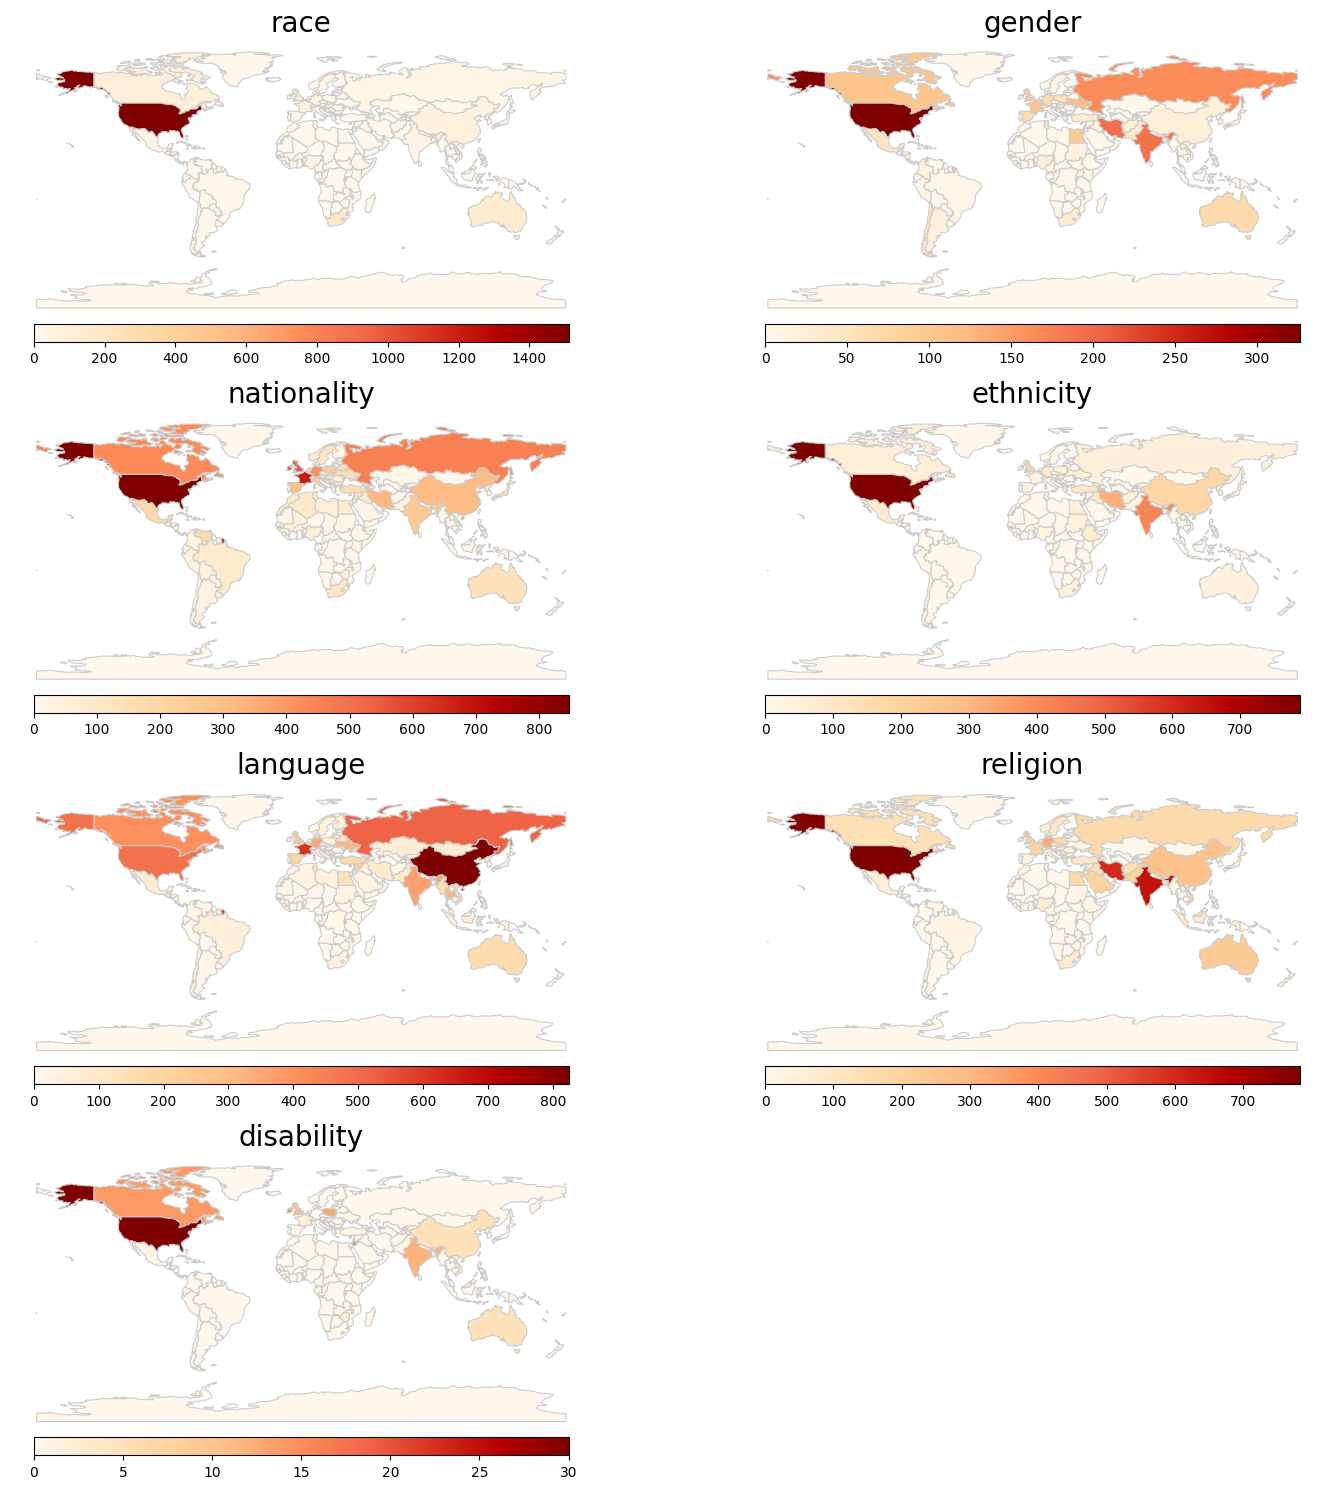

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, axs = plt.subplots(nrows=len(key_topics)//2 + 1, ncols=2, figsize=(15, 15))

for idx, topic in enumerate(key_topics):
    row, col = divmod(idx, 2)
    world_merged = world.set_index('name').join(df_transposed[topic], how='left').fillna(0)
    world_merged.plot(column=topic, cmap='OrRd', linewidth=0.8, ax=axs[row, col], edgecolor='0.8')
    axs[row, col].set_title(topic, fontsize=20)
    axs[row, col].axis('off')

    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=world_merged[topic].min(), vmax=world_merged[topic].max()))
    sm._A = []  # fake up the array of the scalar mappable
    cbar = fig.colorbar(sm, ax=axs[row, col], orientation='horizontal', fraction=0.059, aspect=30, pad=0.01)  # Adjust the aspect ratio here
    
total_plots = len(key_topics)
for i in range(total_plots, (len(axs.flatten()))):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


In [18]:
# save figure
fig.savefig(os.path.join('outputs','map_zeroshot_'+representation+'_minsize'+str(min_topic_size)+'_minsimilarity'+str(zeroshot_min_similarity)+'.png'), bbox_inches='tight')

In [19]:
top_5_per_category = {}

for category in df_transposed.columns:
    top_5_per_category[category] = df_transposed.sort_values(by=category, ascending=False).head(5)[category].to_dict()


top_5_per_category['race']


{'United States of America': 1511,
 'South Africa': 183,
 'United Kingdom': 155,
 'Georgia': 149,
 'Australia': 143}

In [20]:
df_top_5_per_category = pd.DataFrame(top_5_per_category)
df_top_5_per_category

,disability,ethnicity,gender,language,nationality,race,religion
United States of America,30.0,788.0,326.0,482.0,847.0,1511.0,783.0
Jordan,18.0,NaN,NaN,NaN,NaN,NaN,NaN
Israel,16.0,509.0,NaN,NaN,NaN,NaN,572.0
Ireland,15.0,NaN,NaN,NaN,577.0,NaN,NaN
Canada,14.0,NaN,NaN,407.0,NaN,NaN,NaN
India,NaN,416.0,190.0,NaN,NaN,NaN,648.0
Iran,NaN,321.0,194.0,NaN,NaN,NaN,598.0
United Kingdom,NaN,199.0,NaN,NaN,554.0,155.0,NaN
Russia,NaN,NaN,163.0,516.0,454.0,NaN,NaN
Ukraine,NaN,NaN,123.0,NaN,NaN,NaN,NaN
